### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing  import PolynomialFeatures
from  sklearn.linear_model import Ridge
from  sklearn.linear_model import Lasso
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('twitter.data',header = None)

In [3]:
new_col = ["NCD","AI","AS(NA)","BL","NAC","AS(NAC)","CS","AT","NA","ADL","NAD"]
for i in range(len(data.columns)):
    if i < 7:
        data=data.rename(columns = {i:new_col[0] + '_'+ str(i)})
    elif i >= 7 and i < 14:
        data=data.rename(columns = {i:new_col[1] + '_'+ str(i-7)})
    elif i >= 14 and i < 21:
        data=data.rename(columns = {i:new_col[2] + '_'+ str(i-14)})
    elif i >= 21 and i < 28:
        data=data.rename(columns = {i:new_col[3] + '_'+ str(i-21)})
    elif i >= 28 and i < 35:
        data=data.rename(columns = {i:new_col[4] + '_'+ str(i-28)})
    elif i >= 35 and i < 42:
        data=data.rename(columns = {i:new_col[5] + '_'+ str(i-35)})
    elif i >= 42 and i < 49:
        data=data.rename(columns = {i:new_col[6] + '_'+ str(i-42)})
    elif i >= 49 and i < 56:
        data=data.rename(columns = {i:new_col[7] + '_'+ str(i-49)})
    elif i >= 56 and i < 63:
        data=data.rename(columns = {i:new_col[8] + '_'+ str(i-56)})
    elif i >= 63 and i < 70:
        data=data.rename(columns = {i:new_col[9] + '_'+ str(i-63)})
    elif i >= 70 and i < 77:
        data=data.rename(columns = {i:new_col[10] + '_'+ str(i-70)})
    else:
        data = data.rename(columns= {i:'Target'})

# Exploring data

In [88]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [89]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

In [91]:
data.isna().sum()

NCD_0       0
NCD_1       0
NCD_2       0
NCD_3       0
NCD_4       0
NCD_5       0
NCD_6       0
AI_0        0
AI_1        0
AI_2        0
AI_3        0
AI_4        0
AI_5        0
AI_6        0
AS(NA)_0    0
AS(NA)_1    0
AS(NA)_2    0
AS(NA)_3    0
AS(NA)_4    0
AS(NA)_5    0
AS(NA)_6    0
BL_0        0
BL_1        0
BL_2        0
BL_3        0
BL_4        0
BL_5        0
BL_6        0
NAC_0       0
NAC_1       0
           ..
CS_6        0
AT_0        0
AT_1        0
AT_2        0
AT_3        0
AT_4        0
AT_5        0
AT_6        0
NA_0        0
NA_1        0
NA_2        0
NA_3        0
NA_4        0
NA_5        0
NA_6        0
ADL_0       0
ADL_1       0
ADL_2       0
ADL_3       0
ADL_4       0
ADL_5       0
ADL_6       0
NAD_0       0
NAD_1       0
NAD_2       0
NAD_3       0
NAD_4       0
NAD_5       0
NAD_6       0
Target      0
Length: 78, dtype: int64

# Taking sample data

In [4]:
X = data.drop('Target',axis =1 )
y = data['Target']

In [63]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

# Data Scaling

After observing range of all variables, we decided to normalize the data to restrict the range of values in the dataset between [0,1] so that all the variables will have significant impact on analysis. For this perpose we applied MinMaxScaler.  

In [92]:
X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# KNN regressor

In [54]:
from sklearn.model_selection import train_test_split
_, sample_data_knn, _, sample_target_knn = train_test_split(X, y, shuffle = True, test_size = 0.03)


X_train_org, X_test_org, y_train_knn, y_test_knn = train_test_split(sample_data_knn, sample_target_knn, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train_knn = scaler.fit_transform(X_train_org)
X_test_knn = scaler.transform(X_test_org)

param_grid = [{'n_neighbors': [5,6,7,8,9,10]}]

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_knn.fit(X_train_knn, y_train_knn)

print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.87


In [56]:
print('Train score{: .3f}'.format(grid_knn.score(X_train_knn, y_train_knn)))
print('Test score{: .3f}'.format(grid_knn.score(X_test_knn,y_test_knn)))

Train score 0.906
Test score 0.873


In [57]:
knn = grid_knn.score(X_test_knn,y_test_knn)

# Linear regression with normal equation

In [65]:
lreg = LinearRegression()

In [66]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
lreg.score(X_train,y_train)

0.949315353191137

In [68]:
lreg.score(X_test,y_test)

0.9632486362750126

In [69]:
lreg_result = lreg.score(X_test,y_test)

Text(0.5,0,'RM')

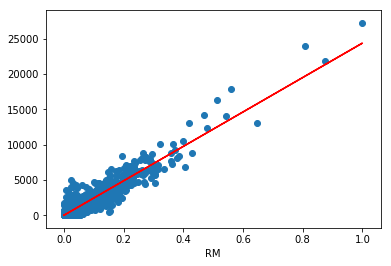

In [93]:
lreg_1 = LinearRegression()
X_train_rm = X_train[:,5].reshape(-1,1)
lreg_1.fit(X_train_rm, y_train)
y_predict = lreg_1.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# Polynomial

In [18]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg = LinearRegression()
    scores1 = cross_val_score(lreg, X_train_poly, y_train, cv=5)
    train_score_list.append(scores1.mean())
    lreg.fit(X_train_poly,y_train)
    scores_2 = lreg.score(X_test_poly,y_test)
    test_score_list.append(scores_2)

print(train_score_list)
print(test_score_list)

[0.8542721059527792, -1.70338058562769]
[0.8830679625806539, 0.45075904322255245]


In [26]:
polynomial = test_score_list[1]

# Ridge

In [19]:
ridge = Ridge()


param_grid = { 'alpha' : [0.01, 0.1, 1, 10, 100]}
        
print("Parameter grid:\n{}".format(param_grid))

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

grid_ridge.fit(X_train, y_train)

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [20]:
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_ridge.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.86


In [21]:
print('train score:{:.3f}'.format(grid_ridge.score(X_train,y_train)))
print('test score:{:.3f}'.format(grid_ridge.score(X_test,y_test)))

train score:0.881
test score:0.887


In [22]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ridge', grid_ridge)])

In [23]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ridge', GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])

In [24]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.89


In [27]:
ridge = pipe.score(X_test, y_test)

In [28]:
ridge

0.8871468770663753

# lasso

In [29]:
lasso = Lasso()


param_grid = { 'alpha' : [0.01, 0.1, 1, 10, 100]}
        
print("Parameter grid:\n{}".format(param_grid))

grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)

grid_search_lasso.fit(X_train, y_train)

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}


c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: 

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.87


In [31]:
print('train score:{:.3f}'.format(grid_search_lasso.score(X_train,y_train)))
print('test score:{:.3f}'.format(grid_search_lasso.score(X_test,y_test)))

train score:0.848
test score:0.921


In [32]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('lasso', grid_search_lasso)])

In [33]:
pipe.fit(X_train, y_train)

c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\shubham\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: 

Pipeline(memory=None,
     steps=[('lasso', GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0))])

In [34]:
print("Test score : {:.2f}".format(pipe.score(X_test, y_test)))

Test score : 0.92


In [35]:
lasso = pipe.score(X_test, y_test)

# SVR

In [37]:
param_grid = {'C': [ 0.1, 1, 10],
              'gamma': [0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}


In [38]:
grid_svr = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=3, return_train_score=True)

In [42]:
from sklearn.model_selection import train_test_split
_, sample_data_svr, _, sample_target_svr = train_test_split(X, y, shuffle = True, test_size = 0.03)


X_train_org, X_test_org, y_train_svr, y_test_svr = train_test_split(sample_data_svr, sample_target_svr, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train_svr = scaler.fit_transform(X_train_org)
X_test_svr = scaler.transform(X_test_org)

In [43]:
grid_svr.fit(X_train_svr, y_train_svr)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [44]:
print("Best parameters: {}".format(grid_svr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svr.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.59


In [46]:
print('train score:{:.3f}'.format(grid_svr.score(X_train_svr,y_train_svr)))
print('test score:{:.3f}'.format(grid_svr.score(X_test_svr,y_test_svr)))

train score:0.678
test score:0.711


In [48]:
svr = grid_svr.score(X_test_svr,y_test_svr)

# Kernel - SVR

In [49]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10],
             'kernel':['rbf']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}


In [50]:
grid_kernel = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

In [51]:
grid_kernel.fit(X_train_svr, y_train_svr)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
print('train score:{:.3f}'.format(grid_kernel.score(X_train_svr,y_train_svr)))
print('test score:{:.3f}'.format(grid_kernel.score(X_test_svr,y_test_svr)))

train score:0.423
test score:0.333


In [53]:
svr_kernel = grid_kernel.score(X_test_svr,y_test_svr)

# Comparing all models

In [70]:
result = pd.DataFrame([knn,lreg_result,polynomial,ridge,lasso,svr,svr_kernel], columns=['r2 score'], index = ['KNN','Linear Regression','Polynomial','Ridge','Lasso','SVR','SVR with kernel'])

In [71]:
result

,r2 score
KNN,0.872683
Linear Regression,0.963249
Polynomial,0.450759
Ridge,0.887147
Lasso,0.921182
SVR,0.710776
SVR with kernel,0.333379


# Running linear regression and lasso regression on complete dataset

In [72]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Linear regression

In [73]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
lreg.score(X_train,y_train)

0.9327419369182747

In [75]:
lreg.score(X_test,y_test)

0.9479748733882266

In [78]:
y_pred = lreg.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error

In [79]:
mean_squared_error(y_test,y_pred)

19024.403672426848

# Lasso Regression

In [80]:
lasso  = Lasso()

In [81]:
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
lreg.score(X_train,y_train)

0.9327419369182747

In [83]:
lreg.score(X_test,y_test)

0.9479748733882266

In [86]:
y_pred_lasso = lasso.predict(X_test)

In [87]:
mean_squared_error(y_test,y_pred_lasso)

56594.052871502114

# Conclusion

We analysed data and calculated coefficient of determination using various models such as linear regression, lasso, ridge, polynomial, SVR, SVR with kernel, knn regressor. 

Linear regression and lasso resgression predicted target value wth highetst r2 score on sample data so we implemented both models on whole dataset and evaluated their performance on r2 score and mean squared error. 

As observed Mean squared error of linear regression is less than lasso regression, we came to conclusion that linear regression is best model for this dataset.